# Designing a Fictitious Model for Hyperparameter Tuning  

One of the challenges in the practice of hyperparameter tuning is the computational resources it consumes, where for even a simple classification model, the running time and computational cost could be a concern. To ease such difficulty, this notebook defines a calculation-based model with four outputs that mimic the following performance metrics for a hypothetical classifier:

* Precision
* Recall
* Training loss
* Model accuracy

These four outputs are affected by three input variables that mimic the following tuning parameters for the classifier: 

* Threshold
* Number of epochs
* Learning rate  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Precision and Recall vs Threshold

Let us start with defining two outputs that mimic `Precision` and `Recall` in a binary classification problem as functions of an input that mimics threshold, denoted with `thr`, using the following equations:

$Precision(thr) = 0.1 + 0.9/( 1 + 5000e^{-20 \times thr} )$

$Recall(thr) = 1/(1 + 10^{-5}e^{20 \times thr})$

Taking all other parameters fixed, next figure shows how the two equations above emulate `Precision` and `Recall` as functions of `thr` in a hypothetical binary classifier. 

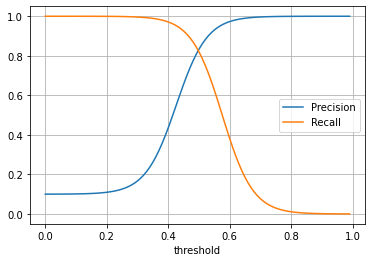

In [10]:
thr = np.arange(0, 1, 0.01)
precision = 0.1 + 0.9 / (1 + 5000 * np.exp(-20 * thr))
recall = 1 / (1 + 1e-5 * np.exp(20 * thr))

prec_rec = [precision, recall]
labels = ["Precision", "Recall"]
for i in range(len(prec_rec)):
    plt.plot(thr, prec_rec[i], label=labels[i])
plt.xlabel("threshold")
plt.legend()
plt.grid()
plt.show()

## Training Loss and Model Accuracy vs Number of Epochs

We define the third output that mimics training `Loss` as a function of the second input that mimics number of `epochs` in a deep learning algorithm, using the following equation:

$Loss(epoch) = 3 + 7e^{-0.05 \times epoch}$

As another function of number of `epochs`, we define our fourth output that mimics model `Accuracy` using the following equation:

$Accuracy(epoch) = 0.95 - 3 [\log(3-0.025 \times epoch)]^2$

Next figure shows how these two equations emulate training `Loss` and model `Accuracy` as performance metrics, changing with the number of `epochs` as a tuning parameter. Notice how the effect of data overfitting creates a peak on the model accuracy curve while the training loss can still decrease by increasing the number of epochs. Also notice that for a better visualization, the plot shows `Accuracy` in 10x its value. 

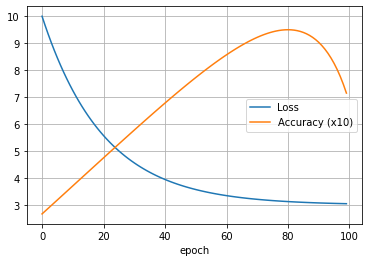

In [9]:
epoch = np.arange(0, 100, 1)
loss = 3 + 7 * np.exp(-0.05 * epoch)
accuracy = 0.95 - 3 * (np.log10(3 - 0.025 * epoch)) ** 2

los_acc_epoch = [loss, 10 * accuracy]
labels = ["Loss", "Accuracy (x10)"]
for i in range(len(los_acc_epoch)):
    plt.plot(epoch, los_acc_epoch[i], label=labels[i])
plt.xlabel("epoch")
plt.legend()
plt.grid()
plt.show()

## Training Loss and Model Accuracy vs Learning Rate

Finally, we introduce the third model input to mimic the learning rate, denoted with `lr`, in a model learning algorithm. Taking all other parameters fixed, we use the following equations to emulate the change in training `Loss` and model `Accuracy` as the outputs while `lr` changes as an input:

$Loss(lr) = 0.6 + [\log(0.9-\log(lr))]^2$

$Accuracy(lr) = 0.98 – [\log(0.7-0.5\log(lr))]^2$

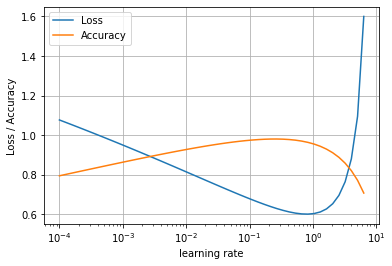

In [8]:
lr = np.logspace(-4, 0.8)
z = np.log10(lr)
loss = 0.6 + (np.log10(0.9 - z)) ** 2
accuracy = 0.98 - (np.log10(0.7 - 0.5 * z)) ** 2

los_acc_lr = [loss, accuracy]
labels = ["Loss", "Accuracy"]
plt.xscale("log")
for i in range(len(los_acc_lr)):
    plt.plot(lr, los_acc_lr[i], label=labels[i])
plt.ylabel("Loss / Accuracy")
plt.xlabel("learning rate")
plt.legend()
plt.grid()
plt.show()

## Hyperparameter Tuning as a Multivariable Optimization Problem

To create a more realistic model of hyperparameter tuning, it is important to understand that finding an optimal set of hyperparameters often leads to solving a multivariable optimization problem. In such problems, the effect of changing one tuning parameter is not limited to only one performance metric, but also affects (all) other metrics in a competing scenario, meaning that improving one metric is often a detriment to others. 

So far, we have created a set of deterministic univariate functions that correlate our four imaginary performance metrics (model outputs) to one tuning parameter (model input) at a time, assuming the two other parameters are fixed. To make a more realistic model of hyperparameter tuning as a multivariable optimization problem, we define the following multivariate functions:

$Accuracy(epoch, \; lr) = k_A \times Accuracy(epoch) \times Accuracy(lr)$

$Precision(thr, \; epoch, \; lr) = k_P \times Precision(thr) \times Accuracy(epoch, \; lr)$

$Recall(thr, \; epoch, \; lr) = k_R \times Recall(thr) \times Accuracy(epoch, \; lr)$

$Loss(epoch, \; lr) = k_L \times Loss(epoch) \times Loss(lr)$

where $k_A$, $k_P$, $k_R$ and $k_L$ are constant scalar factors with default values of 1. 

## Using the Model with HyperDrive Step 

AzureML HyperDrive package automates efficient hyperparameter tuning by specifying the primary metric we want hyperparameter tuning to optimize. Each training run is evaluated for the primary metric, and the early termination policy uses it to identify low-performance runs.

To make our fictitious model handy with the HyperDrive step, we also define the traditional F-measure or balanced F-score that combines precision and recall as

$F_1 = 2 \times (Precision \times Recall)/(Precision + Recall)$

See an [example](./HyperDrive_MultiStep_Training_Pipeline.ipynb) of using this model in a hyperparameter tuning pipeline.